Problem 9 chapter 6 : In this exercise, we will predict the number of applications received
using the other variables in the College data set.

In [16]:
## import statements
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [17]:
## Loading the dataset
filepath = '../../datasets/ISLR/data/csv/'
filename = 'College.csv'
college_df = pd.read_csv(filepath+filename)

# Binarizing the label private and dropping unnamed columns
college_df['Private'].replace(['Yes','No'],[1,0],inplace = True)
college_df = college_df.loc[:, ~college_df.columns.str.contains('^Unnamed')]


(a) Split the data set into a training set and a test set.

In [18]:
## Splits the data to predict number of apps
y_college = college_df['Apps']
X_college = college_df.drop(['Apps'],axis = 1)

X_college_train, X_college_test, y_college_train, y_college_test = train_test_split(X_college, y_college, shuffle = True, test_size =0.2)


(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [19]:
## Fits a linear regression model and calculates mean squared error between predictions and actual using sklearn function
# Also computes the score of the model
lin_regr = LinearRegression()
lin_regr.fit(X_college_train,y_college_train)
y_pred = lin_regr.predict(X_college_test)

print("Score of the Linear Regression model using least squares  is {}".format(lin_regr.score(X_college_test, y_college_test)))
print('Mean Squared error of the Linear Regression model using least squares is {}'.format(mean_squared_error(y_college_test, y_pred)))

Score of the Linear Regression model using least squares  is 0.9387763911110416
Mean Squared error of the Linear Regression model using least squares is 894210.4543037697


(c) Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.

In [20]:
# Setting up alphas to be tested
alphas = np.arange(0.001,10,.01)

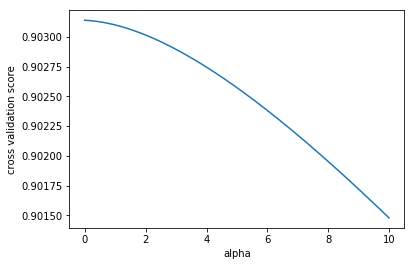

In [21]:
# Scaling the X_train to std and running cross validation score to get best alpha for ridge
scaler = StandardScaler()
X_college_train_std = scaler.fit_transform(X_college_train)
X_college_test_std = scaler.fit_transform(X_college_test)

scores = [cross_val_score(Ridge(alpha), X_college_train_std, y_college_train, cv=5).mean()
            for alpha in alphas]
plt.plot(alphas, scores, label = 'ridge')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()


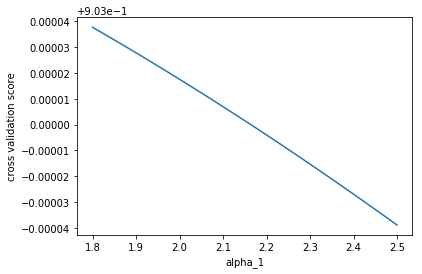

In [22]:
## zooming in on the alphas
alphas_1 = np.arange(1.80,2.50,0.0001)
scores_1 = [cross_val_score(Ridge(alpha), X_college_train_std, y_college_train, cv=5).mean()
            for alpha in alphas_1]
plt.plot(alphas_1, scores_1, label = 'ridge')
plt.xlabel('alpha_1')
plt.ylabel('cross validation score')
plt.show()


In [23]:
## cross validation tells us that our best alpha is around 2.25
# Fitting a model with obtained alpha and calculating MSE and test Score

reg_ridge = Ridge(alpha = 2.25)
reg_ridge.fit(X_college_train_std,y_college_train)
y_pred_1 = reg_ridge.predict(X_college_test_std)


print("Score of the Ridge regression model is {}".format(reg_ridge.score(X_college_test_std, y_college_test)))
print('Mean Squared error of the Ridge regression model is {}'.format(mean_squared_error(y_college_test, y_pred_1)))



Score of the Ridge regression model is 0.9458147167284057
Mean Squared error of the Ridge regression model is 791411.1508642092


(d) Fit a lasso model on the training set, with λ chosen by cross-
validation. Report the test error obtained, along with the num-
ber of non-zero coefficient estimates.

In [24]:
# Generating alphas to be tested for Lasso
alphas_2 = np.arange(1,30, 0.01)

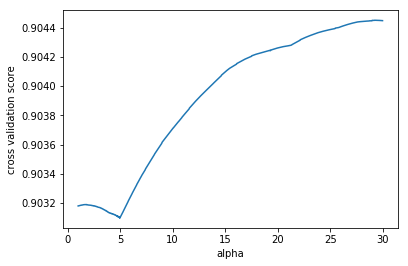

In [25]:
# Scaling the X_train to std and running cross validation score to get best alpha for lasso
scaler = StandardScaler()
X_college_train_std_1 = scaler.fit_transform(X_college_train)
X_college_test_std_1 = scaler.fit_transform(X_college_test)

scores_2 = [cross_val_score(Lasso(alpha), X_college_train_std_1, y_college_train, cv=5).mean()
            for alpha in alphas_2]
plt.plot(alphas_2, scores_2, label = 'Lasso')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()

In [26]:
## cross validation tells us that our best alpha is around 22.5
reg_lasso = Lasso(alpha = 22.5)
reg_lasso.fit(X_college_train_std_1,y_college_train)
y_pred_2 = reg_lasso.predict(X_college_test_std_1)


print("Score of the Lasso regression model is {}".format(reg_lasso.score(X_college_test_std_1, y_college_test)))
print('Mean Squared error of the Lasso regression model is {}'.format(mean_squared_error(y_college_test, y_pred_2)))

Score of the Lasso regression model is 0.945727980392485
Mean Squared error of the Lasso regression model is 792677.991218051


(e) Fit a PCR model on the training set, with M chosen by cross-
validation. Report the test error obtained, along with the value
of M selected by cross-validation.

In [27]:
## making another copies of the x and y from original data frame
scaler = StandardScaler()
y = college_df['Apps']
X = college_df.drop(['Apps'],axis = 1)
X = scaler.fit_transform(X)

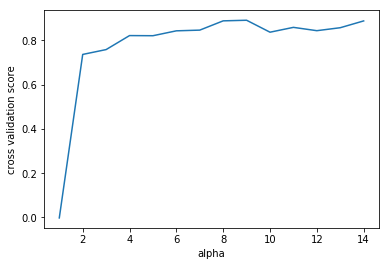

In [28]:
# The function below checks for cross validation score of dimensionality reduction parameter k

alphas_3 = np.arange(1,15,1)
def pca_calc(k): 
    pca = PCA(n_components = k)
    X_transformed = pca.fit_transform(X)
   # print(pca.explained_variance_ratio_)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, shuffle = True, test_size = 0.2)
    return cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean()

# Check PCA scores and plot them against alpha

scores_3 = [pca_calc(alpha) for alpha in alphas_3]

plt.plot(alphas_3, scores_3, label = 'PCA')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()
    

In [29]:
## We can see that M = 4 gives us the best cross validation score
# The code below calculates MSE and Score at the given M
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,shuffle = True, test_size = 0.2)
lin_pca = LinearRegression()
lin_pca.fit(X_train,y_train)
y_pred_pca = lin_pca.predict(X_test)
print("Score of the PCA regression model is {}".format(lin_pca.score(X_test, y_test)))
print('Mean Squared error of the PCA regression model is {}'.format(mean_squared_error(y_pred_pca, y_test)))

Score of the PCA regression model is 0.8621605462292861
Mean Squared error of the PCA regression model is 2111215.3155972096


(f) Fit a PLS model on the training set, with M chosen by cross-
validation. Report the test error obtained, along with the value
of M selected by cross-validation.

In [32]:
## The code below calculates the PLSRegression cross validation score with compo
alphas_4 = np.arange(1,155,1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,shuffle = True, test_size = 0.2)
scores_4 = [cross_val_score(PLSRegression(n_components = alpha), X_train_1, y_train_1, cv=5).mean()
            for alpha in alphas_4]
plt.plot(alphas_4, scores_4, label = 'PLS')
plt.xlabel('alpha_4')
plt.ylabel('cross validation score')
plt.show()

ValueError: Invalid number of components: 18

In [ ]:
# We can see that m = 2 gives us the best cross validation score with least number of directions
# We will predict that score here


reg_pls = PLSRegression(n_components = 2)

reg_pls.fit(X_train_1,y_train_1)
y_pred_pls = reg_pls.predict(X_test_1)

print("Score of the PLS regression model is {}".format(reg_pls.score(X_test_1,y_test_1)))

print('Mean Squared error of the PLS regression model is {}'.format(mean_squared_error(y_pred_pls,y_test_1)))


(g) Comment on the results obtained. How accurately can we pre-
dict the number of college applications received? Is there much
difference among the test errors resulting from these five ap-
proaches?

The dimensionality reduction techniques offered lower test scores indicating that data is correlated. We can predict the number of applications recieved using one of the least squares regression model. In our case, Regular Least squares model gave the highest test score. Lasso and Ridge regression also gave very low test error but slightly lesser than linear Regressions